In [24]:
from nltk.tokenize import sent_tokenize, word_tokenize

data_path = "/Users/yun/Dev/humanet3/human-centered-eu/concat_results/legal-in-force-EUROVOC-3030.txt"

with open(data_path, 'r') as file:
    data = file.read()
    print(data[0]) 
    
sentences = sent_tokenize(data)
sentences = [word_tokenize(sent) for sent in sentences]

In [9]:
from gensim.models import Word2Vec
model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)
model.build_vocab(sentences)


In [25]:

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
model.train(sentences, total_examples=len(sentences), epochs=10)

(256179, 365170)

In [26]:
word_vectors = model.wv

In [52]:
def train_tsne(cnt):
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=cnt, workers=4)
    model.train(sentences, total_examples=len(sentences), epochs=10)
    words = list(word_vectors.key_to_index)
    vectors = [word_vectors[word] for word in words]
    vectors = np.array(vectors)
    tsne = TSNE(n_components=2, perplexity=10, n_iter=1000)
    X_tsne = tsne.fit_transform(vectors)
    return X_tsne, words

In [34]:
from sklearn.manifold import TSNE

words = list(word_vectors.key_to_index)
vectors = [word_vectors[word] for word in words]
vectors = np.array(vectors)
vectors[:100]
type(vectors)

numpy.ndarray

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=10, n_iter=1000)
X_tsne = tsne.fit_transform(vectors)

In [53]:
X_tsne, words = train_tsne(100)

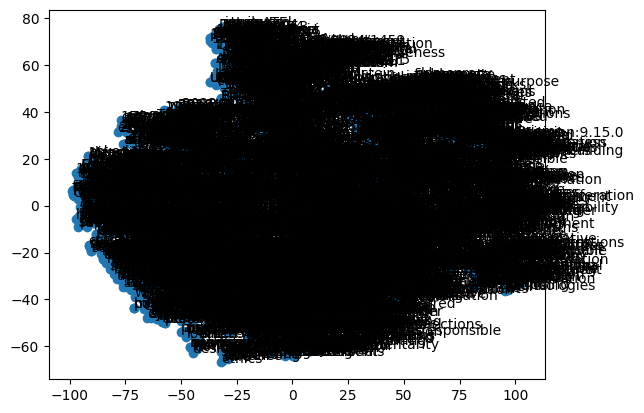

In [54]:
import matplotlib.pyplot as plt

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
for i, word in enumerate(words):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], word)
plt.show()